In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics, decomposition
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.ticker import MaxNLocator

class ExpectationMaximizationTestCluster():
    def __init__(self, X, y, clusters, plot=False, targetcluster=3, stats=False):
        self.X = X
        self.y = y
        self.clusters = clusters
        self.gen_plot = plot
        self.targetcluster = targetcluster
        self.stats = stats

    def run(self):
        ll=[]
        homogeneity_scores=[]
        completeness_scores=[]
        rand_scores=[]
        silhouettes=[]
        bic=[]
        aic=[]
        model = GMM(covariance_type = 'diag')

        for k in self.clusters:
            model.set_params(n_components=k)
            model.fit(self.X)
            labels = model.predict(self.X)
            #print labels
            if k == self.targetcluster and self.stats:
                nd_data = np.concatenate((self.X, np.expand_dims(labels, axis=1),np.expand_dims(self.y, axis=1)), axis=1)
                pd_data = pd.DataFrame(nd_data)
                pd_data.to_csv("cluster_em.csv", index=False, index_label=False, header=False)

                for i in range (0,self.targetcluster):
                    cluster = pd_data.loc[pd_data.iloc[:,-2]==i].iloc[:,-2:]
                    print(cluster.shape[0])
                    
            
            ll.append(model.score(self.X))
            print(model.score(self.X))
            homogeneity_scores.append(metrics.homogeneity_score(self.y, labels))
            completeness_scores.append(metrics.completeness_score(self.y, labels))
            rand_scores.append(metrics.adjusted_rand_score(self.y, labels))
            bic.append(model.bic(self.X))
            aic.append(model.aic(self.X))
           
        if self.gen_plot:
            self.plot(ll, homogeneity_scores, completeness_scores, rand_scores, bic, aic)

    
    def plot(self, ll, homogeneity, completeness, rand, bic, aic):
            """
            Plot average distance from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            

            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, ll)
            plt.xlabel('Number of clusters')
            plt.ylabel('Log Probability')
            plt.title('Wine Quality-EM-Log Probability')
            plt.show()

            """
            Plot homogeneity from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, homogeneity)
            plt.xlabel('Number of clusters')
            plt.ylabel('Homogeneity Score')
            plt.title('Wine Quality-EM-Homogeneity Score')
            plt.show()


            """
            Plot completeness from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, completeness)
            plt.xlabel('Number of clusters')
            plt.ylabel('Completeness Score')
            plt.title('Wine Quality-EM-Completeness Score')
            plt.show()

            """
            Plot BIC Score from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, bic)
            plt.xlabel('Number of clusters')
            plt.ylabel('BIC Score')
            plt.title('Wine Quality-EM-BIC Score')

            """
            Plot AIC Score from observations from the cluster centroid
            to use the Elbow Method to identify number of clusters to choose
            """
            ax = plt.figure().gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            plt.plot(self.clusters, aic)
            plt.xlabel('Number of clusters')
            plt.ylabel('AIC Score')
            plt.title('Wine Quality-EM-AIC Score')
            plt.show()

-5.751288480042955
-4.3855316391537364
1732
2739
427
-3.8516209833996693
-3.5124768614566175
-3.21934671007958
-3.370496351563688
-3.0271773208413437
-2.8912960572818776
-2.8535209978028244
-2.7352067258544897
-2.7002949344405494
-2.6172463003319995
-2.5889533445763337
-2.408580004599823
-2.3995086552743667
-2.409979065175941
-2.3697184568759053
-2.3336303990212337
-2.2306064181651144
-2.191094369748662
-2.159001996540611
-2.0947152646515703
-2.0800034024708856
-2.090960523484925
-1.9871078606871801
-1.9956623322652867
-1.9812329202144694
-1.9372915566580364
-1.9358189456500237
-1.938141749177715


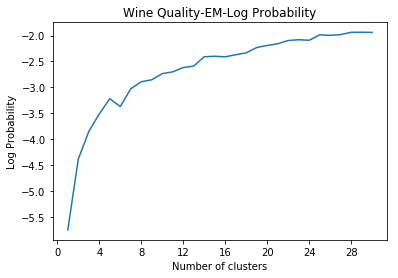

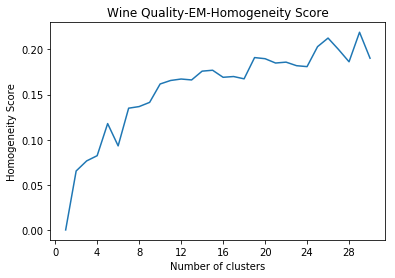

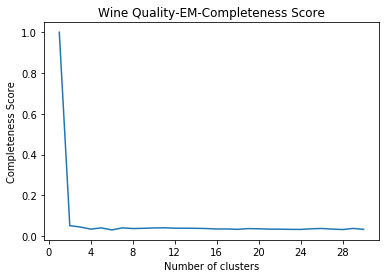

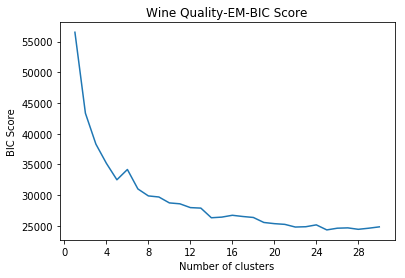

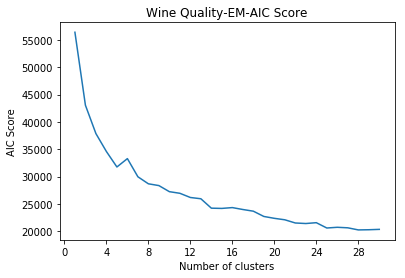

In [4]:

import pandas as pd

def encode_target(df, target_column):  
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod[target_column].replace(map_to_int, inplace=True)
    return (df_mod, map_to_int)

wq_dt = pd.read_csv("winequality-white-v2.csv")
dft, mapping = encode_target(wq_dt, "quality")
dft.to_csv('winequality-white-v3.csv')
X = (dft.iloc[:,:-1])
y = dft.iloc[:, -1]
tester = ExpectationMaximizationTestCluster(X, y, clusters=range(1,31), plot=True, targetcluster=3, stats=True)
tester.run()